# Logistic_Regression_Tutorial

In [225]:
#import paskages
import numpy as np
import matplotlib.pyplot as plt

In [226]:
#data
X = np.array([[25], [18], [30], [19] ,[34],[40],[14],[16],[54],[10]])  # Simplified input feature
y = np.array([1, 0, 1, 0,1,1,0,0,1,0])  # Target labels


In [227]:
m, n = X.shape  # Number of samples (m) and number of features (n)


In [228]:
w = np.zeros((n,))  # Initialize weight to zero


In [229]:
b = 0  # Initialize bias to zero


In [230]:
learning_rate = 0.001  # Learning rate for gradient descent


In [231]:
num_iters = 1000 # Number of iterations for training


In [232]:
b_list = []  # List to store biases for each iteration
w_list = []  # List to store weights for each iteration


# Loop for gradient descent iterations
for i in range(num_iters):
    Z = X.dot(w) + b  # Linear combination of weight and feature plus bias
    a = 1 / (1 + np.exp(-Z))  # Sigmoid activation function
    
    dz = a - y  # Compute derivative of the cost with respect to Z
    dw = (X.T @ dz) / m  # Compute derivative of the cost with respect to weight
    db = np.sum(dz) / m  # Compute derivative of the cost with respect to bias
    
    w -= learning_rate * dw  # Update weight using gradient descent
    b -= learning_rate * db  # Update bias using gradient descent
    b_list.append(b)  # Append bias to the bias list
    w_list.append(w.copy())  # Append weight to the weight list


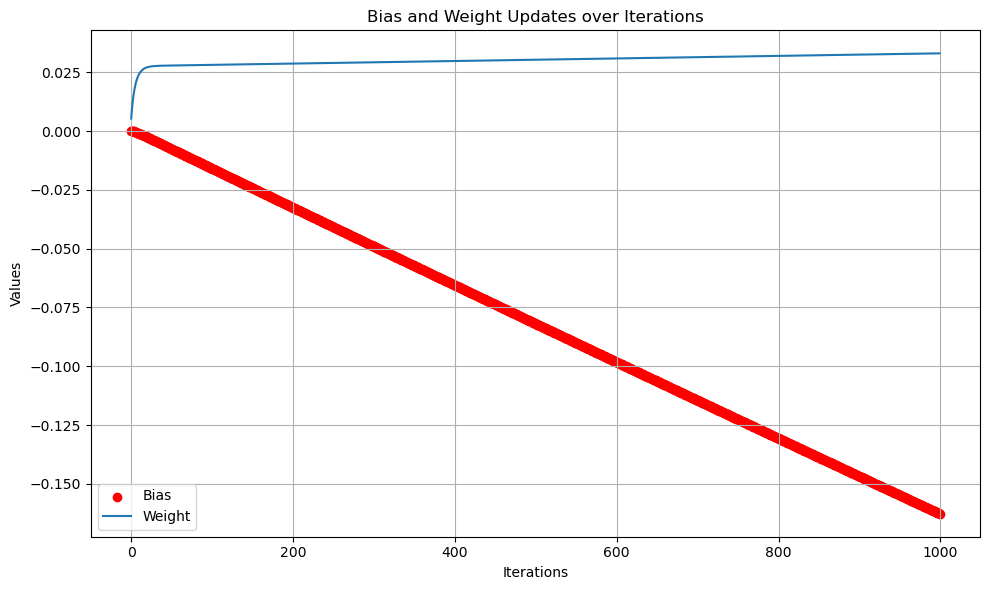

In [233]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(range(num_iters), b_list, label='Bias', color='red')  # Scatter plot for bias
plt.plot(range(num_iters), w_list, label='Weight')  # Line plot for weight
plt.title("Bias and Weight Updates over Iterations")  # Set the title
plt.xlabel("Iterations")  # Label for x-axis
plt.ylabel("Values")  # Label for y-axis
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

###### convert the code into a function 

In [234]:
def train_logistic_regression(X, y, learning_rate=0.01, num_iters=1000):
    """
    Train logistic regression model using gradient descent.
    
    Parameters:
    X (numpy.ndarray): Input features with shape (m, n).
    y (numpy.ndarray): Target labels with shape (m,).
    learning_rate (float): Learning rate for gradient descent (default is 0.01).
    num_iters (int): Number of iterations for training (default is 1000).
    
    Returns:
    weights (numpy.ndarray): Trained weights.
    biases (numpy.ndarray): Trained biases.
    """
    m, n = X.shape  # Number of samples (m) and number of features (n)

    # Initialize weights and biases
    weights = np.zeros((n,))
    biases = 0

    # Lists to store biases and weights for each iteration
    bias_list = []
    weight_list = []

    # Gradient descent iterations
    for i in range(num_iters):
        # Forward pass
        Z = X.dot(weights) + biases
        a = 1 / (1 + np.exp(-Z))

        # Backward pass (Gradient computation)
        dz = a - y
        dw = (X.T @ dz) / m
        db = np.sum(dz) / m

        # Parameter updates
        weights -= learning_rate * dw
        biases -= learning_rate * db

        # Store biases and weights
        bias_list.append(biases)
        weight_list.append(weights.copy())

    return weights, biases, bias_list, weight_list

In [235]:
# Train logistic regression model
trained_weights, trained_biases, bias_list, weight_list = train_logistic_regression(X, y)

In [236]:
trained_biases

-1.3735393674340177

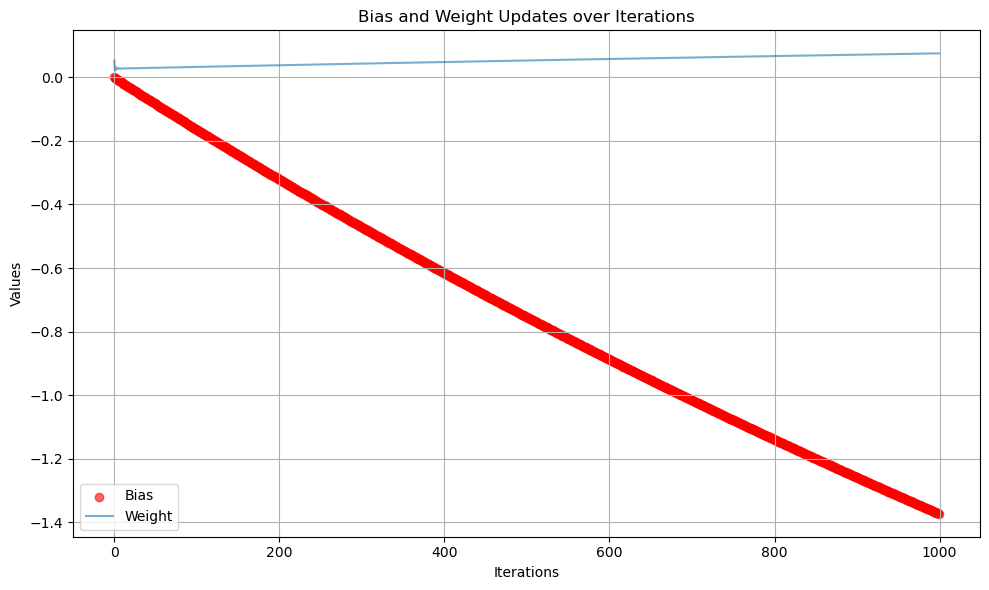

In [237]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(bias_list)), bias_list, label='Bias', color='red', alpha=0.6)
plt.plot(range(len(weight_list)), weight_list, label='Weight', alpha=0.6)
plt.title("Bias and Weight Updates over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [238]:
# Make predictions data X
predictions = 1 / (1 + np.exp(-(X.dot(trained_weights) + trained_biases)))
print("Predictions:", predictions)

Predictions: [0.62733328 0.49759508 0.71087963 0.51653237 0.76901421 0.83988775
 0.42245267 0.4597954  0.93809321 0.35073586]


In [239]:
binary_predictions = (predictions > 0.5).astype(int)  # Convert predictions to binary (0 or 1)
print("Binary Predictions:", binary_predictions)

Binary Predictions: [1 0 1 1 1 1 0 0 1 0]


In [240]:
# Calculate accuracy
accuracy = np.mean(binary_predictions == y)
print("Accuracy:", accuracy)

Accuracy: 0.9


ValueError: x and y must be the same size

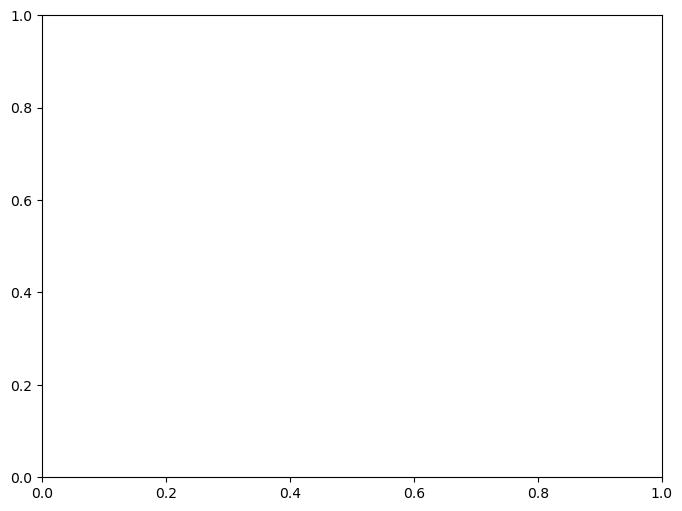

In [245]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue')  # Scatter plot of y vs. predictions
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
plt.grid(True)
plt.show()

In [244]:
#Now tre prediced new data
data=np.array([[9],[13],[44],[50]])
predictions=1/(1+np.exp(-(data.dot(trained_weights)+trained_biases)))
binary_predictions = (predictions > 0.5).astype(int)
print("Binary Predictions:", binary_predictions)

Binary Predictions: [0 0 1 1]
